In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import logisitc regression and Decision trree from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = pd.read_csv('/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/Data/customer_churn_dataset_prepared.csv')

In [3]:
dataset.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Subscription Type_Encoded
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,1,0,1,0,0,2.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,0,1,0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,0,0,1,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,0,1,0,1,0,2.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,0,1,0,1,0,1.0


In [4]:
## splitting the dataset into features and target variable
X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

# train-test split /80% -20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

## Default model
logistic_regression_model_0 = LogisticRegression()
logistic_regression_model_0.fit(X_train, y_train)



/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 i

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",100
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass`

In [26]:
# evaluate the logistic regression models on the test set 

y_pred_lr_0 = logistic_regression_model_0.predict(X_test)
y_pred_lr_1 = logistic_regression_model_grid_cv.predict(X_test)

print("Logistic Regression Model 0 Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_0)}")
print(f"Precision: {precision_score(y_test, y_pred_lr_0)}")
print(f"Recall: {recall_score(y_test, y_pred_lr_0)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr_0)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_0))

print("Logistic Regression Model 1 Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_1)}")
print(f"Precision: {precision_score(y_test, y_pred_lr_1)}")
print(f"Recall: {recall_score(y_test, y_pred_lr_1)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr_1)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_1))

Logistic Regression Model 0 Evaluation:
Accuracy: 0.8544126487234452
Precision: 0.8843488304937915
Recall: 0.8557201021874501
F1 Score: 0.8697989572555941
Confusion Matrix:
[[32456  5607]
 [ 7229 42875]]
Logistic Regression Model 1 Evaluation:
Accuracy: 0.8949606995814761
Precision: 0.9264340453966464
Recall: 0.8854782053329076
F1 Score: 0.9054932495178227
Confusion Matrix:
[[34540  3523]
 [ 5738 44366]]


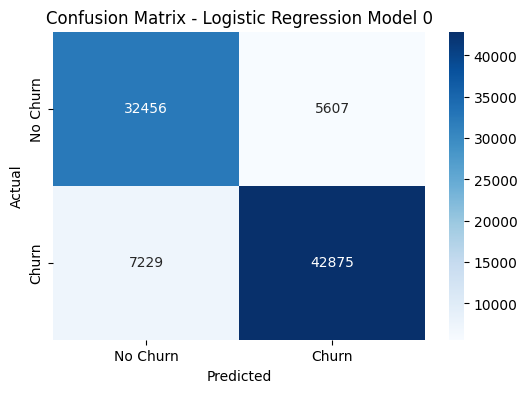

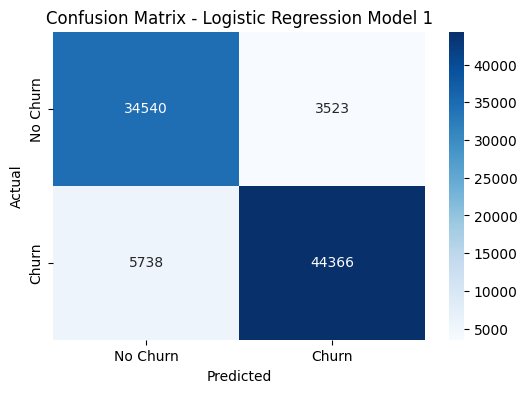

In [27]:
## Visualize true positive, true negative, false positive, false negative using seaborn heatmap for both models

cm_0 = confusion_matrix(y_test, y_pred_lr_0)
plt.figure(figsize=(6,4))
sns.heatmap(cm_0, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression Model 0')
plt.show()

cm_1 = confusion_matrix(y_test, y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression Model 1')
plt.show()



In [23]:
## Exhaustive hyperparameter tuning using GridSearchCV and RandomizedSearchCV

## GridSearchCV for Logistic Regression
param_grid_lr = {
    'penalty': ['l1','l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]

}

grid_search_lr = GridSearchCV(estimator=logistic_regression_model_0, param_grid=param_grid_lr, cv=5, scoring='recall_macro')
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression Model 0:")
print(grid_search_lr.best_params_)

/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Demo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Demo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You 

Best parameters for Logistic Regression Model 0:
{'C': 100, 'max_iter': 300, 'penalty': 'l2'}


/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Demo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print("Best parameters for Logistic Regression Model 0:")
print(grid_search_lr.best_params_)

Best parameters for Logistic Regression Model 0:
{'C': 100, 'max_iter': 300, 'penalty': 'l2'}


In [30]:
# RandomizedSearchCV for logistic regression


param_dist_lr = {
    'penalty': ['l1','l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]

}

random_search_lr = RandomizedSearchCV(estimator=logistic_regression_model_0, param_distributions=param_dist_lr, n_iter=10, cv=5, scoring='recall_macro', random_state=42)
random_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression Model 0 (RandomizedSearchCV):")
print(random_search_lr.best_params_)

/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Demo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Demo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You 

Best parameters for Logistic Regression Model 0 (RandomizedSearchCV):
{'penalty': 'l2', 'max_iter': 300, 'C': 10}


/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Demo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print("Best parameters for Logistic Regression Model 0 (RandomizedSearchCV):")
print(random_search_lr.best_params_)

Best parameters for Logistic Regression Model 0 (RandomizedSearchCV):
{'penalty': 'l2', 'max_iter': 300, 'C': 10}


In [7]:
## optuna for hyperparameter tuning 

def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l2'])
    C = trial.suggest_float('C', 0.01, 100.0, log=True)
    max_iter = trial.suggest_int('max_iter', 100, 300)

    model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)

    return recall

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)


[I 2025-12-14 22:19:52,916] A new study created in memory with name: no-name-717ab653-888c-48d4-879f-fb88309a83a0
/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 296 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=296).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2025-12-14 22:19:54,708] Trial 0 finished with value: 0.8890308159029219 and parameters: {'penalty': 'l2', 'C': 0.8457021224025006, 'max_iter': 296}. Best is trial 0 with value: 0.8890308159029219.
/Users/udaranilupul/Documents/Fr

In [9]:
## view optimized hyperparameters
print("Best parameters from Optuna:")
print(study.best_params)

Best parameters from Optuna:
{'penalty': 'l2', 'C': 61.825065173349415, 'max_iter': 169}


In [11]:
## hyperparameter tuning
logistic_regression_model_optuna = LogisticRegression(C=study.best_params['C'], max_iter=169, penalty='l2')
logistic_regression_model_optuna.fit(X_train, y_train)

/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/udaranilupul/Documents/Freelancing/CodeWave/CodeWaveMl101/Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 169 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=169).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",61.825065173349415
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :te

In [12]:
## Evaluate the optuna tuned model
y_pred_lr_optuna = logistic_regression_model_optuna.predict(X_test) 
print("Logistic Regression Model Optuna Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_optuna)}")
print(f"Precision: {precision_score(y_test, y_pred_lr_optuna)}")
print(f"Recall: {recall_score(y_test, y_pred_lr_optuna)}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr_optuna)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_optuna))

Logistic Regression Model Optuna Evaluation:
Accuracy: 0.8931913300894893
Precision: 0.9202594666060694
Recall: 0.8890906913619671
F1 Score: 0.9044066144897525
Confusion Matrix:
[[34203  3860]
 [ 5557 44547]]


In [ ]:
## Tune the logistic regression model using the best hyperparameters from optuna +++ Homeworks +++
## then draw the confusion matrix and classification report for the tuned model +++ Homeworks +++